# Week 3 Monday

You can find the notesbooks at [course notes](https://yutongo.github.io/UCI_MATH10_F23/intro.html).
* HW3 is posted.
* HW2 due tomorrow night (extended)
* Unlike NumPy and pandas, the data visualization library we use (Altair) would need to be installed on the lab computers.  (That's not difficult, but it would need to be done on each machine.)  So we will benefit from using Deepnote for this portion.


## Plotting based on the Grammar of Graphics

If you've already seen one plotting library in Python, it was probably Matplotlib.  Matplotlib is the most flexible and most widely used Python plotting library.  In Math 10, our main interest is in using Python for Data Science, and for that, there are some specialty plotting libraries that will get us nice results much faster than Matplotlib.

Here we will introduce the plotting library we will use most often in Math 10, Altair, along with two more plotting libraries, Seaborn and Plotly.


Here is the basic setup for Altair, Seaborn, and Plotly:

* We have a pandas DataFrame, and each row in the DataFrame corresponds to one observation (i.e., to one instance, to one data point).

* Each column in the DataFrame corresponds to a variable (also called a dimension, or a feature).

* To produce the visualizations, we encode different columns from the DataFrame into visual properties of the chart (like the x-coordinate, or the color).

## Warm-up: first look at the `mpg` dataset

* Load the `mpg` dataset from the Seaborn library.

In [ ]:
import seaborn as sns
print(sns.get_dataset_names()) # list of all the datasets included with Seaborn.
df = sns.load_dataset("mpg")

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
print(df.shape)
print(df.head(5)) #df.info() #df.describe()

(398, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* How many "origin" values are there in this dataset?

In [ ]:
len(df["origin"].unique())

3

In [ ]:
df["origin"].value_counts(dropna=False)

usa       249
japan      79
europe     70
Name: origin, dtype: int64

In [ ]:
len(df["origin"].value_counts(dropna=False))

3

* How does the average weight of a car differ across these origins?  Use the DataFrame method `groupby` (which we have not seen yet).

Here is an example of the “object-oriented programming” approach of having special-purpose objects. Here we have a `DataFrameGroupBy` object that is probably not used anywhere else.

In [ ]:
df.groupby("origin") #DataFrameGroupBy object

This special object has a mean method, which will report the average values for the various columns when split by their “origin” value. Here we have a whole DataFrame.

In [ ]:
df.groupby("origin").mean()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
origin,,,,,,,
europe,27.891429,4.157143,109.142857,80.558824,2423.300000,16.787143,75.814286
japan,30.450633,4.101266,102.708861,79.835443,2221.227848,16.172152,77.443038
usa,20.083534,6.248996,245.901606,119.048980,3361.931727,15.033735,75.610442


In [ ]:
type(df.groupby("origin").mean()) #Compute mean of groups, excluding missing values.

pandas.core.frame.DataFrame

In [ ]:
df.groupby("origin").mean()["weight"]

origin
europe    2423.300000
japan     2221.227848
usa       3361.931727
Name: weight, dtype: float64

In [ ]:
help(df.groupby("origin").mean)

* Can you calculate that same average weight for "europe" using Boolean indexing?

In [ ]:
df_sub = df[df["origin"] == "europe"]
df_sub["weight"].mean()

2423.3

## Visualizing the data using Altair

To make visualizations in all of these libraries, we encode columns in the dataset to various visual channels in the chart.

* Plot this data using a scatter plot (denoted by `mark_circle()` in Altair).  Encode the "weight" column in the x-coordinate, the "mpg" column in the y-coordinate.

`alt.Chart(df)`: This creates a new chart object using the dataframe `df`. The `df` dataframe should contain the data you want to visualize.

`.mark_circle()`: This tells Altair to represent data points as circles. It specifies the type of mark for the visualization. Altair supports a variety of marks such as `mark_bar()`, `mark_line()`, and so on.

`.encode()`: This function defines the mapping between data columns and visual encoding channels. The arguments within this function determine which column of the dataframe corresponds to which axis or aspect of the chart.

`x = "weight"`: This sets the x-axis of the scatter plot to the "weight" column of the df dataframe.

`y = "mpg"`: Similarly, this sets the y-axis to the "mpg" column of the df dataframe.

In [ ]:
import altair as alt
alt.Chart(df).mark_circle().encode(
    x = "weight",
    y = "mpg"
)

alt.Chart(...)

* Add a color channel to the chart, encoding the "origin" value.

In [ ]:
alt.Chart(df).mark_circle().encode(
    x = "weight",
    y = "mpg",
    color = "origin"
)

alt.Chart(...)

* Add a tooltip to the chart, including the weight, mpg, origin, model year, and the name of the car.

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Notice how if you move your mouse over a point in the chart, you will see all the requested information. Each drawn point should be thought of as corresponding to one row in the original DataFrame.

a tooltip provides supplementary information about a data point when you hover over it. You can specify which columns from your dataframe should be displayed in the tooltip. 


In [ ]:
alt.Chart(df).mark_circle().encode(
    x = "weight",
    y = "mpg",
    color = "origin",
    tooltip = ["weight", "mpg", "origin", "model_year","name"]
)

alt.Chart(...)

## Visualizing the data using Seaborn

* Make a similar chart (using the xy-axes and color but not the tooltip) using Seaborn.
Seaborn is primarily designed for static visualizations, so interactive features like tooltips aren't a core part of its functionality. 

<AxesSubplot: xlabel='weight', ylabel='mpg'>

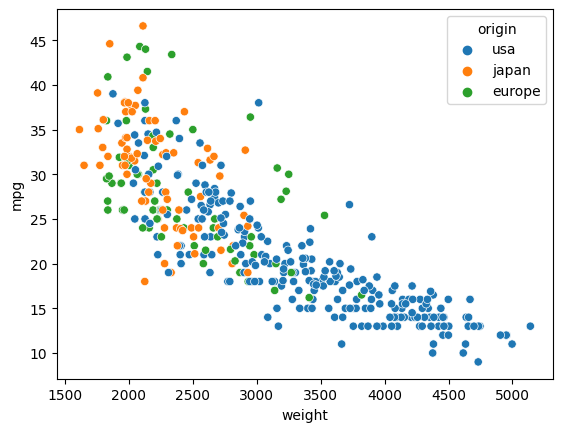

In [ ]:
import seaborn as sns
sns.scatterplot(
    data = df,
    x = "weight",
    y = "mpg",
    hue = "origin"
)

## Visualizing the data using Plotly Express

* Make a similar chart using Plotly Express.

Plotly Express, a part of the Plotly library, is designed for interactive visualizations, and it supports tooltips.

In [ ]:
import plotly.express as px

px.scatter(
    data_frame=df,
    x = "weight",
    y = "mpg",
    color = "origin",
    hover_data= ['name']
)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7071fdff-fb49-4c65-953b-46bf9f7de87f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>